# Network Analysis with NetworkX

In this series of lessons, we're going to learn about network analysis. Network analysis will help us better understand the complex relationships between groups of people, fictional characters, and other kinds of things.

## Dataset

### *Game of Thrones*

<blockquote class="epigraph" style=" padding: 10px">

Lucky it might be, and red it certainly was, but Ygritte’s hair was such a tangle that Jon was tempted to ask her if she only brushed it at the changing of the seasons.

-George R. R. Martin, *A Song of Ice and Fire*
</blockquote>

## Network Basics

## Install NetworkX

In [1]:
#!pip install networkx

## Import Libraries

In [1]:
import networkx
import pandas as pd
#pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt

## *Game of Thrones* Network

The network data that we're going to use in this lesson is taken from Andrew Beveridge and Jie Shan's paper, ["Network of Thrones."](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf)

These researchers calculated how many times each Game of Thrones character appeared within 15 words of another character in *A Storm of Swords*, the third book in the series.

| Network Element      | GOT |         
| :-------------: |:-------------:|
| Node    | GOT character |
| Edge     | Mutually mentioned within 15 words      |
| Float | Decimal Numbers      |  
| Boolean | True/False     |   


For example, the following sentence counts as an "edge" or connection between Jon Snow and Sam Tarly:

> "It was the bastard **Jon Snow** who had taken that from him, him and his fat friend **Sam Tarly**."

> "Lucky it might be, and red it certainly was, but **Ygritte**’s hair was such a tangle that **Jon** was tempted to ask her if she only brushed it at the changing of the seasons."

> "**Arya** gave **Gendry** a sideways look. *He said it with me, like **Jon** used to do, back in Winterfell.* She missed **Jon Snow** the most of all her brothers.""

:::{admonition} Pandas Review
:class: pandasreview
 Do you need a refresher or introduction to the Python data analysis library Pandas? Be sure to check out <a href="https://melaniewalsh.github.io/Intro-Cultural-Analytics/Data-Analysis/Pandas-Basics-Part1.html"> Pandas Basics (1-3) </a> in this textbook!
:::

In [4]:
got_df = pd.read_csv("edgelist.txt", header=None, delimiter=r"\s+")

In [5]:
got_df

,0,1
0,ETDCtrl,4436
1,ntdll,4436
2,ntdll,6524
3,ntdll,6556
4,ntdll,6640
...,...,...
6969,14440,usernotes
6970,14440,windowexplorer
6971,9820,captureservice
6972,9820,windows.internal.capturepicker.desktop


## Create a Network From a Pandas DataFrame

In [10]:
G = networkx.from_pandas_edgelist(got_df, 0, 1)

## Output a Network File

In [11]:
networkx.write_graphml(G, 'GOT-network.graphml')  #graphml is gephi filetype

## Draw a Simple Network

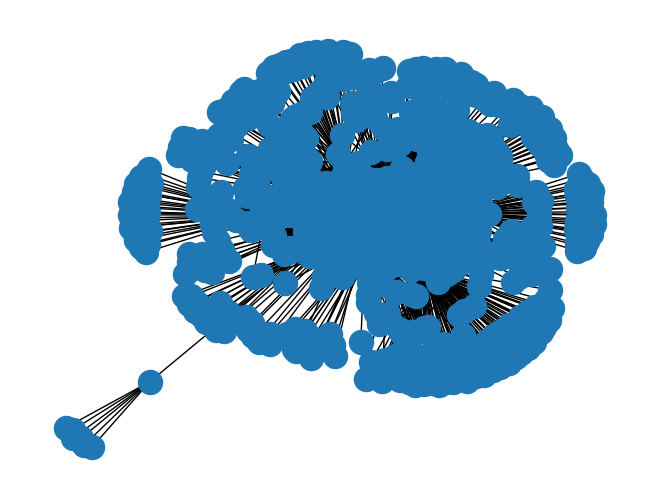

In [12]:
networkx.draw(G)  #Cleary its not good to be seen in there (Ill add a better formated version of this image)

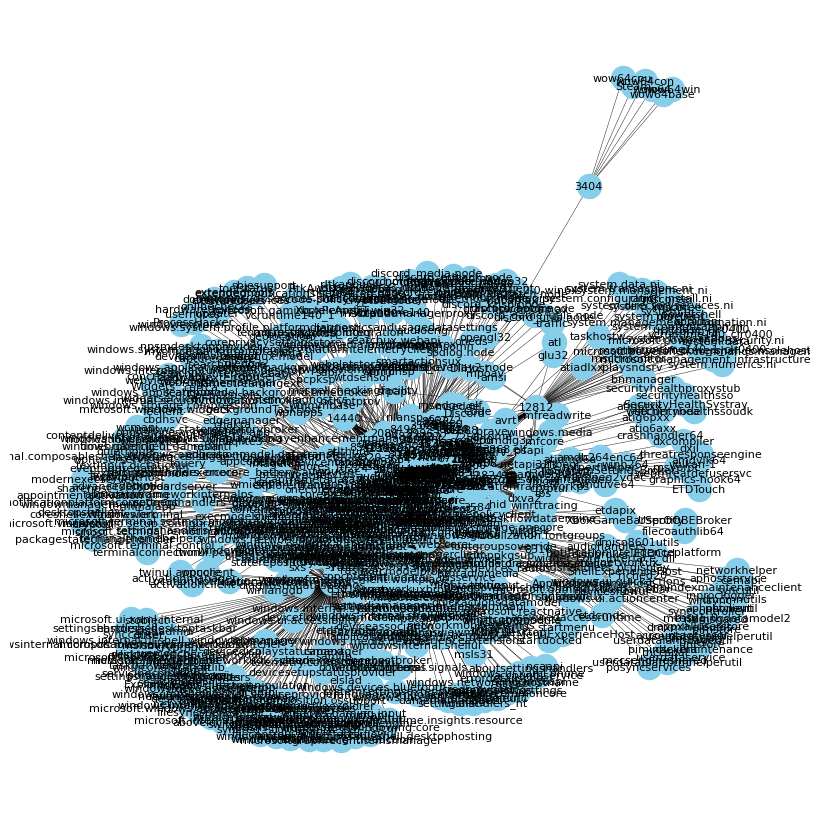

In [13]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

## Calculate Degree

Who has the most number of connections in the network?

In [14]:
networkx.degree(G)

DegreeView({'ETDCtrl': 1, '4436': 61, 'ntdll': 116, '6524': 81, '6556': 73, '6640': 28, '6624': 110, '6900': 40, '4552': 25, '7656': 355, '832': 84, '5188': 190, '7932': 177, '2740': 172, '2532': 75, '1736': 94, '3584': 37, '2080': 23, '8432': 31, '8316': 81, '6924': 108, '1128': 40, '3808': 83, '6256': 48, '7872': 130, '3868': 34, '8496': 48, '3548': 153, '3468': 50, '8232': 29, '12188': 30, '10224': 47, '7256': 23, '8540': 40, '12252': 89, '10748': 117, '4900': 27, '6928': 40, '7468': 69, '5752': 265, '3404': 7, '8636': 114, '6156': 75, '8324': 108, '11956': 82, '6236': 73, '5420': 87, '2912': 95, '12396': 72, '12500': 25, '12976': 84, '12524': 80, '13888': 22, '13488': 87, '13960': 111, '6292': 36, '12812': 80, '9468': 34, '9484': 105, '13664': 39, '13700': 68, '13008': 45, '2164': 39, '9428': 48, '9608': 42, '10560': 48, '3664': 80, '13340': 41, '12824': 63, '1852': 48, '11260': 49, '8076': 115, '1272': 22, '7952': 85, '14308': 49, '7172': 34, '8072': 34, '13884': 34, '10468': 34, 

Make the degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [15]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='degree')`, then sort from highest to lowest

In [16]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
9,7656,355
39,5752,265
11,5188,190
12,7932,177
13,2740,172
...,...,...
540,oledb32,1
534,searchux.core,1
533,slwga,1
532,searchux.internalwebapi,1


Plot the nodes with the highest degree values

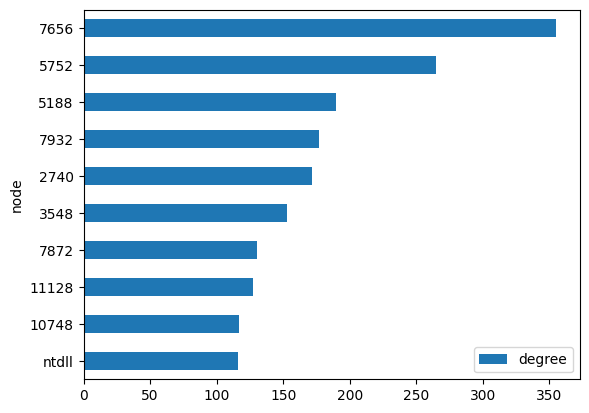

In [17]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

## Calculate Weighted Degree

Who has the most number of connections in the network (if you factor in edge weight)?

In [18]:
networkx.degree(G, weight='Weight')

DegreeView({'ETDCtrl': 1, '4436': 61, 'ntdll': 116, '6524': 81, '6556': 73, '6640': 28, '6624': 110, '6900': 40, '4552': 25, '7656': 355, '832': 84, '5188': 190, '7932': 177, '2740': 172, '2532': 75, '1736': 94, '3584': 37, '2080': 23, '8432': 31, '8316': 81, '6924': 108, '1128': 40, '3808': 83, '6256': 48, '7872': 130, '3868': 34, '8496': 48, '3548': 153, '3468': 50, '8232': 29, '12188': 30, '10224': 47, '7256': 23, '8540': 40, '12252': 89, '10748': 117, '4900': 27, '6928': 40, '7468': 69, '5752': 265, '3404': 7, '8636': 114, '6156': 75, '8324': 108, '11956': 82, '6236': 73, '5420': 87, '2912': 95, '12396': 72, '12500': 25, '12976': 84, '12524': 80, '13888': 22, '13488': 87, '13960': 111, '6292': 36, '12812': 80, '9468': 34, '9484': 105, '13664': 39, '13700': 68, '13008': 45, '2164': 39, '9428': 48, '9608': 42, '10560': 48, '3664': 80, '13340': 41, '12824': 63, '1852': 48, '11260': 49, '8076': 115, '1272': 22, '7952': 85, '14308': 49, '7172': 34, '8072': 34, '13884': 34, '10468': 34, 

Make the weighted degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [19]:
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='weighted_degree')`, then sort from highest to lowest

In [20]:
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

,node,weighted_degree
9,7656,355
39,5752,265
11,5188,190
12,7932,177
13,2740,172
...,...,...
540,oledb32,1
534,searchux.core,1
533,slwga,1
532,searchux.internalwebapi,1


Plot the nodes with the highest weighted degree values

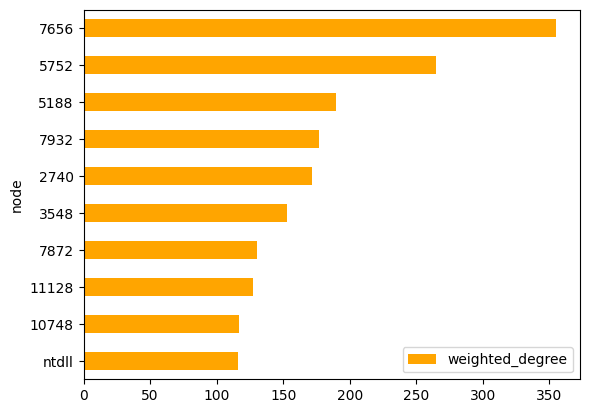

In [21]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()

## Calculate Betweenness Centrality Scores

Who connects the most other nodes in the network?

In [22]:
networkx.betweenness_centrality(G)

{'ETDCtrl': 0.0,
 '4436': 0.014351575194742453,
 'ntdll': 0.032779927049962625,
 '6524': 0.032511952951164755,
 '6556': 0.010022225940920254,
 '6640': 0.004764748252316259,
 '6624': 0.03009335429664807,
 '6900': 0.00923979199211395,
 '4552': 0.0030411052752238456,
 '7656': 0.29050115892685713,
 '832': 0.013628639434767853,
 '5188': 0.06814089239273052,
 '7932': 0.04325133022624095,
 '2740': 0.056889738138976936,
 '2532': 0.007253282695904827,
 '1736': 0.008805558956532736,
 '3584': 0.005505129460157526,
 '2080': 0.002435800913621973,
 '8432': 0.0015902994905506547,
 '8316': 0.06634306218512186,
 '6924': 0.013559329555676878,
 '1128': 0.0004075675817823647,
 '3808': 0.0069568508622125024,
 '6256': 0.0008020065903901882,
 '7872': 0.030150232471866482,
 '3868': 0.009113287349305032,
 '8496': 0.008880670559333668,
 '3548': 0.08072037033281507,
 '3468': 0.0011107386647007528,
 '8232': 0.004526247036912364,
 '12188': 0.005101250821969108,
 '10224': 0.006100564091050386,
 '7256': 0.0029351529

In [23]:
betweenness_centrality = networkx.betweenness_centrality(G)

Add `betweenness_centrality` (which is already a dictionary) as a network "attribute" with `networkx.set_node_attributes()`

In [24]:
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

Make a Pandas dataframe from the betweenness data `G.nodes(data='betweenness')`, then sort from highest to lowest

In [25]:
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
9,7656,0.290501
39,5752,0.138677
27,3548,0.080720
11,5188,0.068141
19,8316,0.066343
...,...,...
540,oledb32,0.000000
534,searchux.core,0.000000
533,slwga,0.000000
532,searchux.internalwebapi,0.000000


Plot the nodes with the highest betweenness centrality scores

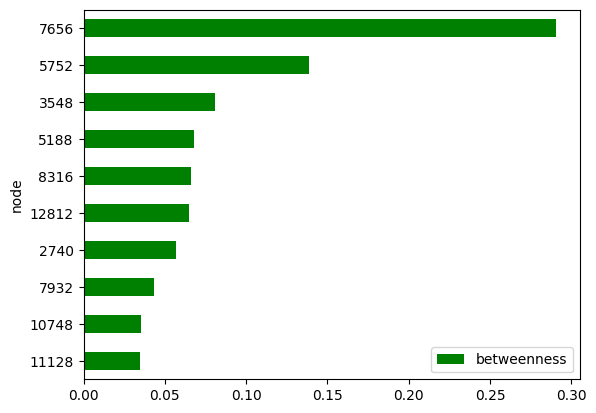

In [26]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

## Communities

Who forms distinct communities within this network?

In [27]:
from networkx.algorithms import community

Calculate communities with `community.greedy_modularity_communities()`

In [28]:
communities = community.greedy_modularity_communities(G)

In [29]:
communities

[frozenset({'10748',
            '11128',
            '12252',
            '12524',
            '1736',
            '2532',
            '2740',
            '2912',
            '3584',
            '5188',
            '5752',
            '6556',
            '6624',
            '6924',
            '7656',
            '7872',
            '7932',
            '8076',
            '9484',
            'Explorer.EXE',
            'RuntimeBroker',
            'SearchHost',
            'ShellExperienceHost',
            'StartMenuExperienceHost',
            'SystemSettings',
            'SystemSettingsBroker',
            'TextInputHost',
            'UserOOBEBroker',
            'XboxGameBarSpotify',
            'aadwamextension',
            'aboutsettingshandlers',
            'abovelockapphost',
            'accountsservice',
            'actioncenter',
            'activationclient',
            'activationmanager',
            'actxprxy',
            'advancedemojids',
            'aepic',


Make a `dict`ionary by looping through the communities and, for each member of the community, adding their community number

In [30]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

Add modularity class to the network as an attribute

In [31]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

Make a Pandas dataframe from modularity class network data `G.nodes(data='modularity_class')`

In [32]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [33]:
communities_df

,node,modularity_class
780,wow64win,6
40,3404,6
777,Steam,6
778,wow64,6
779,wow64base,6
...,...,...
234,ntasn1,0
482,storageusage,0
483,ieframe,0
484,mlang,0


Inspect each community in the network

In [34]:
communities_df[communities_df['modularity_class'] == 4]

,node,modularity_class
279,systemeventsbrokerclient,4
621,synccontroller,4
619,msv1_0,4
618,inproclogger,4
616,dmxmlhelputils,4
615,dmcmnutils,4
614,dmcfgutils,4
633,messagingdatamodel2,4
613,mccspal,4
612,syncutil,4


In [35]:
communities_df[communities_df['modularity_class'] == 3]

,node,modularity_class
713,psapi,3
798,mfperfhelper,3
797,msmpeg2vdec,3
661,windows.media,3
796,atiadlxx,3
795,atig6txx,3
794,atio6axx,3
793,atig6pxx,3
792,glu32,3
791,opengl32,3


In [36]:
communities_df[communities_df['modularity_class'] == 2]

,node,modularity_class
690,discord_utils.node,2
683,qwave,2
684,traffic,2
685,openh264-2.2.0-win64,2
686,mediapipe,2
...,...,...
823,mscoree,2
712,discord_dispatch.node,2
836,appidapi,2
714,quiethours.node,2


In [37]:
communities_df[communities_df['modularity_class'] == 1]

,node,modularity_class
292,ETDTouch,1
286,playsndsrv,1
291,winmm,1
354,secur32,1
288,msutb,1
...,...,...
206,daxexec,1
60,13700,1
55,6292,1
54,13960,1


In [38]:
communities_df[communities_df['modularity_class'] == 0]

,node,modularity_class
221,activationclient,0
222,policymanager,0
220,inputhost,0
224,appxdeploymentclient,0
589,appxpackaging,0
...,...,...
234,ntasn1,0
482,storageusage,0
483,ieframe,0
484,mlang,0


Plot a sample of 40 characters with their modularity class indicated by a star

In [39]:
import seaborn as sns

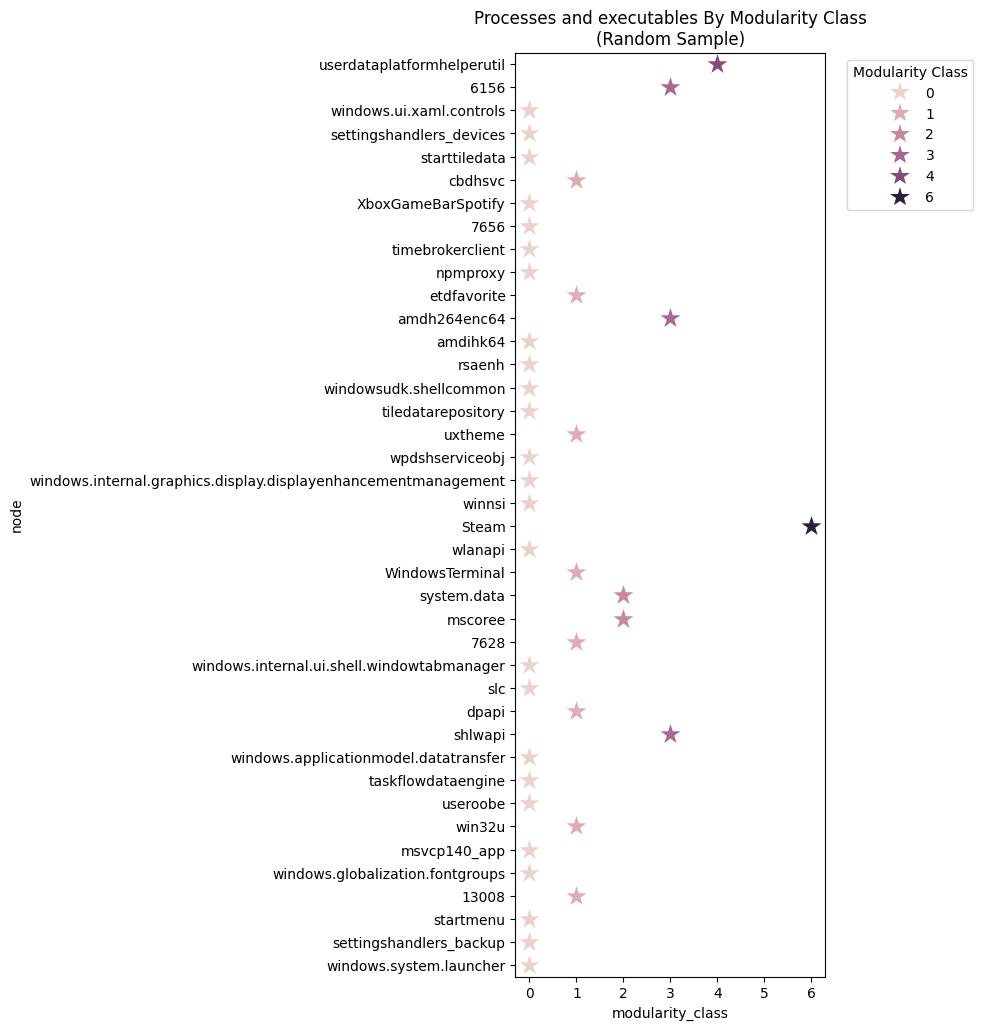

In [48]:
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Processes and executables By Modularity Class\n(Random Sample)")
plt.show()

Plot all GOT characters with their modularity class indicated by a star (tak

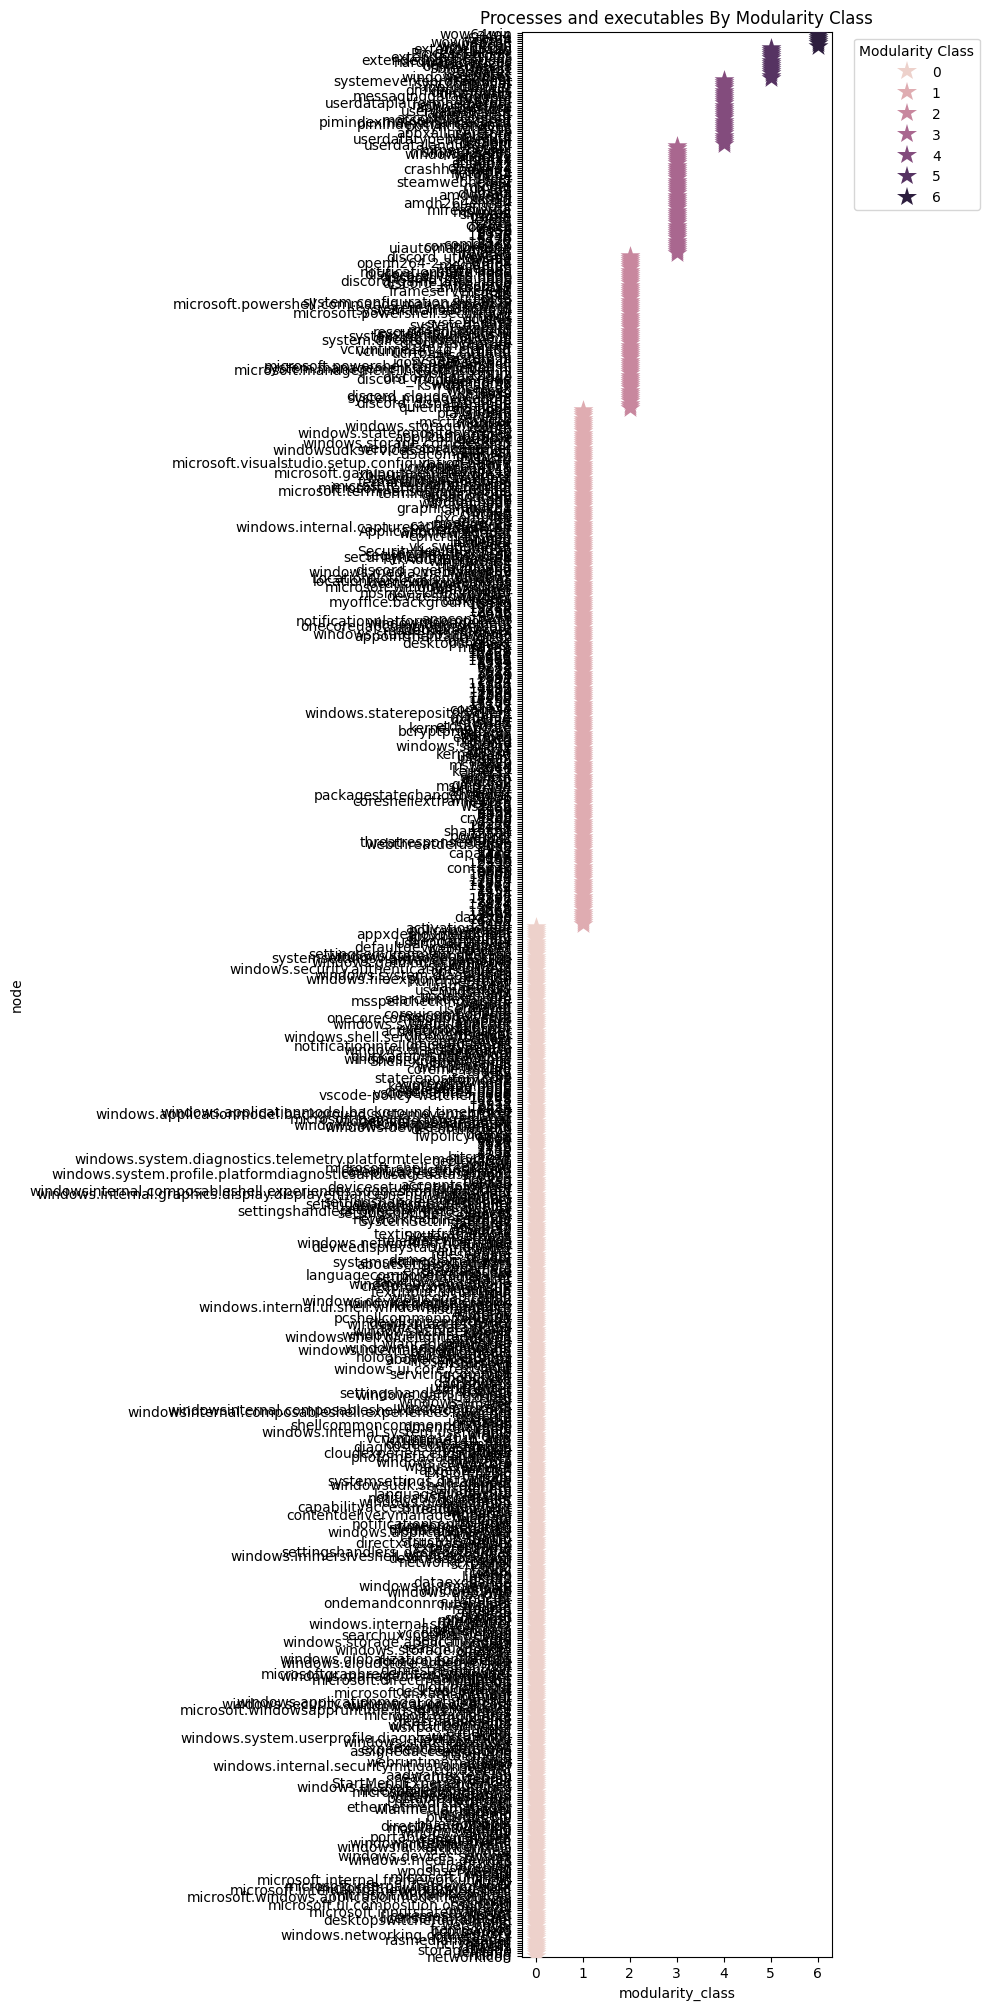

In [49]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Processes and executables By Modularity Class")
plt.show()

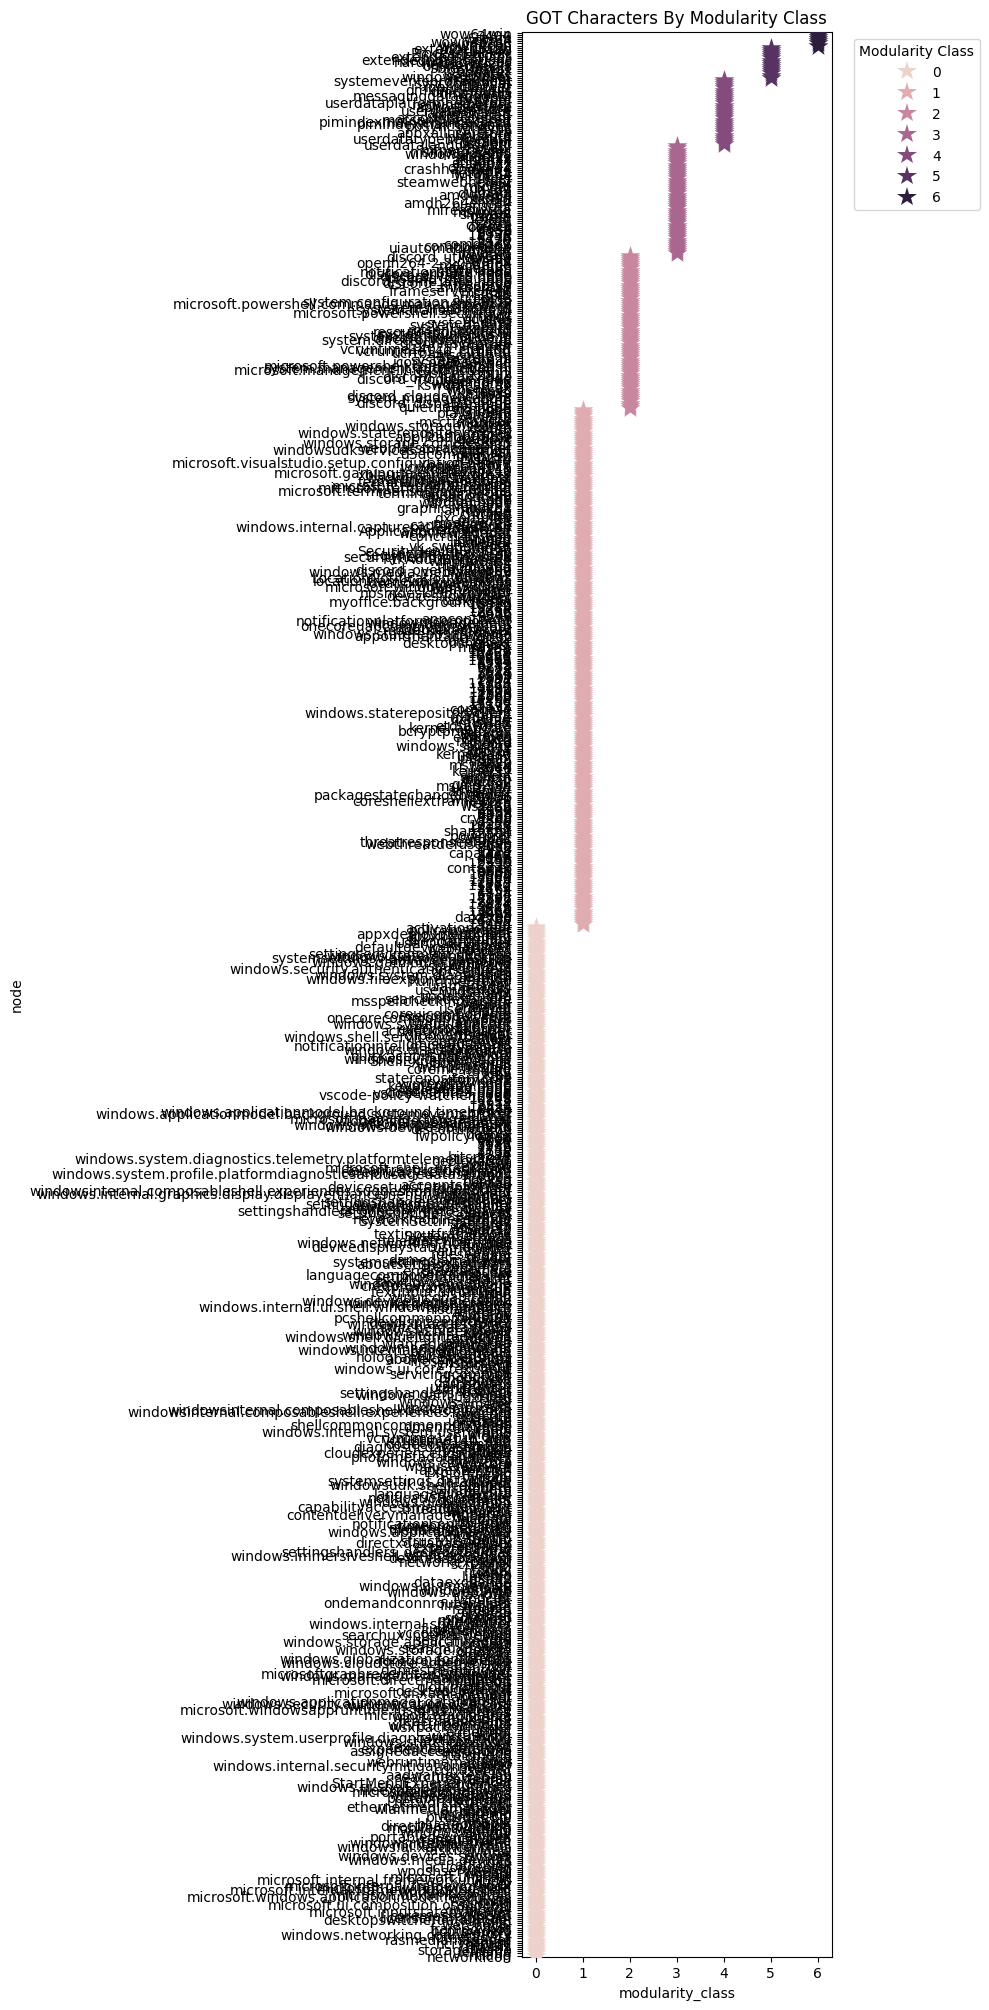

In [50]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class")
plt.show()

## All Network Metrics

Create a Pandas dataframe of all network attributes by creating a `dict`ionary of `G.nodes(data=True)`...

In [51]:
dict(G.nodes(data=True))

{'ETDCtrl': {'degree': 1,
  'weighted_degree': 1,
  'betweenness': 0.0,
  'modularity_class': 1},
 '4436': {'degree': 61,
  'weighted_degree': 61,
  'betweenness': 0.014351575194742453,
  'modularity_class': 1},
 'ntdll': {'degree': 116,
  'weighted_degree': 116,
  'betweenness': 0.032779927049962625,
  'modularity_class': 1},
 '6524': {'degree': 81,
  'weighted_degree': 81,
  'betweenness': 0.032511952951164755,
  'modularity_class': 1},
 '6556': {'degree': 73,
  'weighted_degree': 73,
  'betweenness': 0.010022225940920254,
  'modularity_class': 0},
 '6640': {'degree': 28,
  'weighted_degree': 28,
  'betweenness': 0.004764748252316259,
  'modularity_class': 1},
 '6624': {'degree': 110,
  'weighted_degree': 110,
  'betweenness': 0.03009335429664807,
  'modularity_class': 0},
 '6900': {'degree': 40,
  'weighted_degree': 40,
  'betweenness': 0.00923979199211395,
  'modularity_class': 1},
 '4552': {'degree': 25,
  'weighted_degree': 25,
  'betweenness': 0.0030411052752238456,
  'modularit

...and then [transposing it](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html) (flipping the columns and rows) with `.T`

In [52]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

,degree,weighted_degree,betweenness,modularity_class
ETDCtrl,1.0,1.0,0.000000,1.0
4436,61.0,61.0,0.014352,1.0
ntdll,116.0,116.0,0.032780,1.0
6524,81.0,81.0,0.032512,1.0
6556,73.0,73.0,0.010022,0.0
...,...,...,...,...
usernotes,1.0,1.0,0.000000,5.0
windowexplorer,1.0,1.0,0.000000,5.0
captureservice,1.0,1.0,0.000000,1.0
windows.internal.capturepicker.desktop,1.0,1.0,0.000000,1.0


In [54]:
nodes_df.sort_values(by='degree', ascending=False)

,degree,weighted_degree,betweenness,modularity_class
7656,355.0,355.0,0.290501,0.0
5752,265.0,265.0,0.138677,0.0
5188,190.0,190.0,0.068141,0.0
7932,177.0,177.0,0.043251,0.0
2740,172.0,172.0,0.056890,0.0
...,...,...,...,...
oledb32,1.0,1.0,0.000000,0.0
searchux.core,1.0,1.0,0.000000,0.0
slwga,1.0,1.0,0.000000,0.0
searchux.internalwebapi,1.0,1.0,0.000000,0.0
